In [2]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression

In [5]:
data=pd.read_csv("C:/Users/abc/Desktop/Data Science/Assignments/Logistic Regression/bank-full.csv",sep=";")

In [6]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


As we can see some columns need to be converted to numerical format 

In [8]:
data["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [9]:
data["job"].replace({
    "unknown":np.nan,
    "management":0,
    "technician":1,
    "entrepreneur":2,
    "blue-collar":3,
    "retired":4,
    "admin":5,
    "services":6,
    "self-employed":7,
    "unemployed":8,
    "housemaid":9,
    "student":10
},inplace=True)

In [10]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,1,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,3,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,NaN,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
data["job"].unique()

array([0, 1, 2, 3, nan, 4, 'admin.', 6, 7, 8, 9, 10], dtype=object)

here i converted the job column to numeric format and confirmed there are no any other categorical format

now lets convert all the columns

In [12]:
data["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [13]:
data["marital"].replace({
    "married":1,
    "single":0,
    "divorced":2
    
},inplace=True)

In [14]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,1,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,1,0,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,1,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,3,1,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,NaN,0,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,1,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,4,2,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,4,1,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,3,1,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [15]:
data["marital"].unique()

array([1, 0, 2], dtype=int64)

In [16]:
data["education"].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [17]:
data["education"].replace({
    "unknown":np.nan,
    "primary":0,
    "secondary":1,
    "tertiary":2
    
},inplace=True)

In [18]:
data["education"].unique()

array([ 2.,  1., nan,  0.])

In [19]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,1,2.0,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,1,0,1.0,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,1,1.0,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,3,1,NaN,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,NaN,0,NaN,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,1,2.0,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,4,2,0.0,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,4,1,1.0,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,3,1,1.0,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [20]:
data["default"].unique()

array(['no', 'yes'], dtype=object)

In [21]:
data["default"].replace({
    "no":0,
    "yes":1
},inplace=True)

In [22]:
data["default"].unique()

array([0, 1], dtype=int64)

In [23]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,1,2.0,0,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,1,0,1.0,0,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,1,1.0,0,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,3,1,NaN,0,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,NaN,0,NaN,0,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,1,2.0,0,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,4,2,0.0,0,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,4,1,1.0,0,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,3,1,1.0,0,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [24]:
data["housing"].unique()

array(['yes', 'no'], dtype=object)

In [25]:
data["housing"].replace({
    "no":0,
    "yes":1
},inplace=True)

In [26]:
data["housing"].unique()

array([1, 0], dtype=int64)

In [27]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,1,2.0,0,2143,1,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,1,0,1.0,0,29,1,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,1,1.0,0,2,1,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,3,1,NaN,0,1506,1,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,NaN,0,NaN,0,1,0,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,1,2.0,0,825,0,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,4,2,0.0,0,1729,0,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,4,1,1.0,0,5715,0,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,3,1,1.0,0,668,0,no,telephone,17,nov,508,4,-1,0,unknown,no


In [28]:
data["loan"].unique()

array(['no', 'yes'], dtype=object)

In [29]:
data["loan"].replace({
    "no":0,
    "yes":1
},inplace=True)

In [30]:
data["loan"].unique()

array([0, 1], dtype=int64)

In [31]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,1,2.0,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no
1,44,1,0,1.0,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,1,1.0,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,3,1,NaN,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no
4,33,NaN,0,NaN,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,1,2.0,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,4,2,0.0,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,4,1,1.0,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,yes
45209,57,3,1,1.0,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,no


In [32]:
data["contact"].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [33]:
data["contact"].replace({
    "unknown":np.nan,
    "cellular":0,
    "telephone":1
},inplace=True)

In [34]:
data["contact"].unique()

array([nan,  0.,  1.])

In [35]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,1,2.0,0,2143,1,0,NaN,5,may,261,1,-1,0,unknown,no
1,44,1,0,1.0,0,29,1,0,NaN,5,may,151,1,-1,0,unknown,no
2,33,2,1,1.0,0,2,1,1,NaN,5,may,76,1,-1,0,unknown,no
3,47,3,1,NaN,0,1506,1,0,NaN,5,may,92,1,-1,0,unknown,no
4,33,NaN,0,NaN,0,1,0,0,NaN,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,1,2.0,0,825,0,0,0.0,17,nov,977,3,-1,0,unknown,yes
45207,71,4,2,0.0,0,1729,0,0,0.0,17,nov,456,2,-1,0,unknown,yes
45208,72,4,1,1.0,0,5715,0,0,0.0,17,nov,1127,5,184,3,success,yes
45209,57,3,1,1.0,0,668,0,0,1.0,17,nov,508,4,-1,0,unknown,no


In [36]:
data["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [37]:
data["month"].replace({
    "jan":1,
    "feb":2,
    "mar":3,
    "apr":4,
    "may":5,
    "jun":6,
    "jul":7,
    "aug":8,
    "sep":9,
    "oct":10,
    "nov":11,
    "dec":12
},inplace=True)

In [38]:
data["month"].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9], dtype=int64)

In [39]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,1,2.0,0,2143,1,0,NaN,5,5,261,1,-1,0,unknown,no
1,44,1,0,1.0,0,29,1,0,NaN,5,5,151,1,-1,0,unknown,no
2,33,2,1,1.0,0,2,1,1,NaN,5,5,76,1,-1,0,unknown,no
3,47,3,1,NaN,0,1506,1,0,NaN,5,5,92,1,-1,0,unknown,no
4,33,NaN,0,NaN,0,1,0,0,NaN,5,5,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,1,2.0,0,825,0,0,0.0,17,11,977,3,-1,0,unknown,yes
45207,71,4,2,0.0,0,1729,0,0,0.0,17,11,456,2,-1,0,unknown,yes
45208,72,4,1,1.0,0,5715,0,0,0.0,17,11,1127,5,184,3,success,yes
45209,57,3,1,1.0,0,668,0,0,1.0,17,11,508,4,-1,0,unknown,no


In [40]:
data["poutcome"].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [41]:
data["poutcome"].replace({
    "unknown":np.nan,
    "failure":0,
    "other":1,
    "success":2
},inplace=True)

In [42]:
data["poutcome"].unique()

array([nan,  0.,  1.,  2.])

In [43]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,1,2.0,0,2143,1,0,NaN,5,5,261,1,-1,0,NaN,no
1,44,1,0,1.0,0,29,1,0,NaN,5,5,151,1,-1,0,NaN,no
2,33,2,1,1.0,0,2,1,1,NaN,5,5,76,1,-1,0,NaN,no
3,47,3,1,NaN,0,1506,1,0,NaN,5,5,92,1,-1,0,NaN,no
4,33,NaN,0,NaN,0,1,0,0,NaN,5,5,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,1,2.0,0,825,0,0,0.0,17,11,977,3,-1,0,NaN,yes
45207,71,4,2,0.0,0,1729,0,0,0.0,17,11,456,2,-1,0,NaN,yes
45208,72,4,1,1.0,0,5715,0,0,0.0,17,11,1127,5,184,3,2.0,yes
45209,57,3,1,1.0,0,668,0,0,1.0,17,11,508,4,-1,0,NaN,no


In [44]:
data["y"].unique()

array(['no', 'yes'], dtype=object)

In [45]:
data["y"].replace({
    "no":0,
    "yes":1
},inplace=True)

In [46]:
data["y"].unique()

array([0, 1], dtype=int64)

In [47]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,1,2.0,0,2143,1,0,NaN,5,5,261,1,-1,0,NaN,0
1,44,1,0,1.0,0,29,1,0,NaN,5,5,151,1,-1,0,NaN,0
2,33,2,1,1.0,0,2,1,1,NaN,5,5,76,1,-1,0,NaN,0
3,47,3,1,NaN,0,1506,1,0,NaN,5,5,92,1,-1,0,NaN,0
4,33,NaN,0,NaN,0,1,0,0,NaN,5,5,198,1,-1,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,1,2.0,0,825,0,0,0.0,17,11,977,3,-1,0,NaN,1
45207,71,4,2,0.0,0,1729,0,0,0.0,17,11,456,2,-1,0,NaN,1
45208,72,4,1,1.0,0,5715,0,0,0.0,17,11,1127,5,184,3,2.0,1
45209,57,3,1,1.0,0,668,0,0,1.0,17,11,508,4,-1,0,NaN,0


we have converted all the categorical values to numerical value

In [48]:
data1=data.copy()

In [49]:
data1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,1,2.0,0,2143,1,0,NaN,5,5,261,1,-1,0,NaN,0
1,44,1,0,1.0,0,29,1,0,NaN,5,5,151,1,-1,0,NaN,0
2,33,2,1,1.0,0,2,1,1,NaN,5,5,76,1,-1,0,NaN,0
3,47,3,1,NaN,0,1506,1,0,NaN,5,5,92,1,-1,0,NaN,0
4,33,NaN,0,NaN,0,1,0,0,NaN,5,5,198,1,-1,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,1,2.0,0,825,0,0,0.0,17,11,977,3,-1,0,NaN,1
45207,71,4,2,0.0,0,1729,0,0,0.0,17,11,456,2,-1,0,NaN,1
45208,72,4,1,1.0,0,5715,0,0,0.0,17,11,1127,5,184,3,2.0,1
45209,57,3,1,1.0,0,668,0,0,1.0,17,11,508,4,-1,0,NaN,0


In [50]:
data1.info()
#in columns 'job' it shows data type object so lets convert it to numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        44923 non-null  object 
 2   marital    45211 non-null  int64  
 3   education  43354 non-null  float64
 4   default    45211 non-null  int64  
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  int64  
 7   loan       45211 non-null  int64  
 8   contact    32191 non-null  float64
 9   day        45211 non-null  int64  
 10  month      45211 non-null  int64  
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   8252 non-null   float64
 16  y          45211 non-null  int64  
dtypes: float64(3), int64(13), object(1)
memory usage: 5.9+ MB


In [51]:
data1['job']=pd.to_numeric(data1['job'],errors='coerce')

In [52]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        39752 non-null  float64
 2   marital    45211 non-null  int64  
 3   education  43354 non-null  float64
 4   default    45211 non-null  int64  
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  int64  
 7   loan       45211 non-null  int64  
 8   contact    32191 non-null  float64
 9   day        45211 non-null  int64  
 10  month      45211 non-null  int64  
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   8252 non-null   float64
 16  y          45211 non-null  int64  
dtypes: float64(4), int64(13)
memory usage: 5.9 MB


In [53]:
data1[data1.duplicated()].shape
#there are no duplicated columns or rows

(0, 17)

In [54]:
#lets cheack for missing values and treat them 
data1.info()
data1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        39752 non-null  float64
 2   marital    45211 non-null  int64  
 3   education  43354 non-null  float64
 4   default    45211 non-null  int64  
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  int64  
 7   loan       45211 non-null  int64  
 8   contact    32191 non-null  float64
 9   day        45211 non-null  int64  
 10  month      45211 non-null  int64  
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   8252 non-null   float64
 16  y          45211 non-null  int64  
dtypes: float64(4), int64(13)
memory usage: 5.9 MB


age              0
job           5459
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

we can see there are some missing values or na values in columns 'job','education','contact' and 'poutcomes'

<AxesSubplot:>

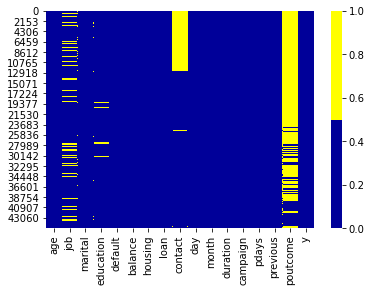

In [55]:
import seaborn as sns
cols = data1.columns
colours = ['#000099','#ffff00']
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colours))

here the yellow colour indicates the missing values

In [56]:
data2=data1.dropna()

In [57]:
data2.info()
data2.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6785 entries, 24064 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        6785 non-null   int64  
 1   job        6785 non-null   float64
 2   marital    6785 non-null   int64  
 3   education  6785 non-null   float64
 4   default    6785 non-null   int64  
 5   balance    6785 non-null   int64  
 6   housing    6785 non-null   int64  
 7   loan       6785 non-null   int64  
 8   contact    6785 non-null   float64
 9   day        6785 non-null   int64  
 10  month      6785 non-null   int64  
 11  duration   6785 non-null   int64  
 12  campaign   6785 non-null   int64  
 13  pdays      6785 non-null   int64  
 14  previous   6785 non-null   int64  
 15  poutcome   6785 non-null   float64
 16  y          6785 non-null   int64  
dtypes: float64(4), int64(13)
memory usage: 954.1 KB


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<AxesSubplot:>

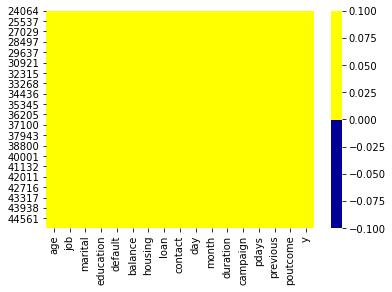

In [58]:
cols = data1.columns
colours = ['#000099','#ffff00']
sns.heatmap(data2[cols].isnull(),cmap=sns.color_palette(colours))

we have removed all the null values

In [59]:
data2.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,6785.000000,6785.000000,6785.000000,6785.000000,6785.000000,6785.000000,6785.000000,6785.000000,6785.000000,6785.000000,6785.000000,6785.000000,6785.000000,6785.000000,6785.000000,6785.000000,6785.000000
mean,41.048195,2.865438,0.804274,1.222108,0.006927,1613.456890,0.625203,0.134119,0.077377,14.292262,5.821665,263.559175,2.084304,222.158585,3.182609,0.581430,0.227856
std,11.551714,2.818982,0.609002,0.678194,0.082946,3215.153103,0.484106,0.340806,0.267208,7.861375,3.107503,239.177517,1.590424,111.224479,4.778476,0.775819,0.419480
min,18.000000,0.000000,0.000000,0.000000,0.000000,-1884.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,1.000000,0.000000,171.000000,0.000000,0.000000,0.000000,7.000000,4.000000,114.000000,1.000000,133.000000,1.000000,0.000000,0.000000
50%,38.000000,3.000000,1.000000,1.000000,0.000000,614.000000,1.000000,0.000000,0.000000,14.000000,5.000000,195.000000,2.000000,193.000000,2.000000,0.000000,0.000000
75%,48.000000,4.000000,1.000000,2.000000,0.000000,1802.000000,1.000000,0.000000,0.000000,20.000000,8.000000,326.000000,2.000000,324.000000,4.000000,1.000000,0.000000
max,89.000000,10.000000,2.000000,2.000000,1.000000,81204.000000,1.000000,1.000000,1.000000,31.000000,12.000000,2219.000000,16.000000,871.000000,275.000000,2.000000,1.000000


<AxesSubplot:>

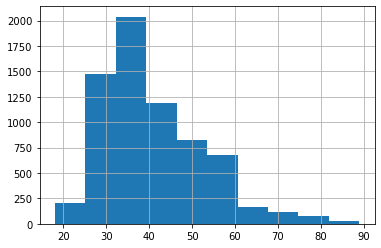

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
data2['age'].hist()

<AxesSubplot:>

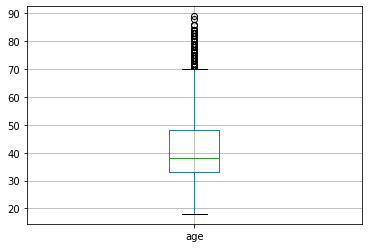

In [61]:
data2.boxplot(column=['age'])

In [62]:
uf=48+(1.5*(48-33))
uf

70.5

In [63]:
lf=48-(1.5*(48-33))
lf

25.5

In [64]:
data2[data2.age>uf]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
40363,83,4.0,1,0.0,0,425,0,0,1.0,22,6,883,1,140,1,0.0,1
40368,73,4.0,1,2.0,0,448,0,0,0.0,22,6,68,1,90,1,2.0,0
40401,72,7.0,1,2.0,0,132,0,0,0.0,1,7,260,2,65,1,2.0,1
40786,83,4.0,1,2.0,0,6236,0,0,0.0,11,8,155,1,190,2,0.0,0
40789,71,0.0,1,2.0,0,13297,0,0,0.0,11,8,265,1,190,2,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45118,78,4.0,1,0.0,0,14204,0,0,0.0,26,10,150,1,183,1,1.0,0
45163,71,4.0,1,1.0,0,2064,0,0,0.0,9,11,379,2,92,3,0.0,0
45191,75,4.0,2,2.0,0,3810,1,0,0.0,16,11,262,1,183,1,0.0,1
45204,73,4.0,1,1.0,0,2850,0,0,0.0,17,11,300,1,40,8,0.0,1


In [65]:
data3=data2[data2.age<uf]
data3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24064,33,6.0,1,1.0,0,3444,1,0,1.0,21,10,144,1,91,4,0.0,1
24072,36,0.0,1,2.0,0,2415,1,0,1.0,22,10,73,1,86,4,1.0,0
24077,36,0.0,1,2.0,0,0,1,0,1.0,23,10,140,1,143,3,0.0,1
24086,44,3.0,1,1.0,0,1324,1,0,1.0,25,10,119,1,89,2,1.0,0
24122,26,1.0,0,2.0,0,172,0,1,1.0,4,11,21,1,140,4,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,59,0.0,1,2.0,0,138,1,1,0.0,16,11,162,2,187,5,0.0,0
45195,68,4.0,1,1.0,0,1146,0,0,0.0,16,11,212,1,187,6,2.0,1
45199,34,3.0,0,1.0,0,1475,1,0,0.0,16,11,1166,3,530,12,1.0,0
45201,53,0.0,1,2.0,0,583,0,0,0.0,17,11,226,1,184,4,2.0,1


In [66]:
data3.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000
mean,40.181640,2.833912,0.795108,1.235543,0.007096,1553.659369,0.640193,0.137249,0.068700,14.266496,5.799789,260.789823,2.089234,223.640344,3.182999,0.569681,0.221048
std,10.237946,2.840130,0.609618,0.670444,0.083948,2850.229785,0.479980,0.344136,0.252962,7.852889,3.097736,237.510043,1.599242,111.456785,4.812118,0.768961,0.414984
min,18.000000,0.000000,0.000000,0.000000,0.000000,-1884.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,1.000000,0.000000,166.000000,0.000000,0.000000,0.000000,7.000000,4.000000,113.000000,1.000000,136.000000,1.000000,0.000000,0.000000
50%,38.000000,3.000000,1.000000,1.000000,0.000000,591.000000,1.000000,0.000000,0.000000,14.000000,5.000000,193.000000,2.000000,195.000000,2.000000,0.000000,0.000000
75%,47.000000,4.000000,1.000000,2.000000,0.000000,1761.000000,1.000000,0.000000,0.000000,19.000000,8.000000,323.000000,2.000000,326.000000,4.000000,1.000000,0.000000
max,70.000000,10.000000,2.000000,2.000000,1.000000,52587.000000,1.000000,1.000000,1.000000,31.000000,12.000000,2219.000000,16.000000,871.000000,275.000000,2.000000,1.000000


<AxesSubplot:>

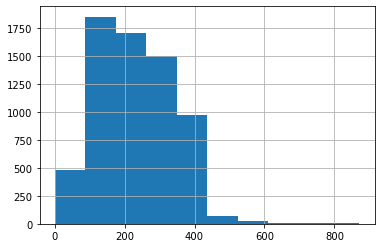

In [67]:
data3['pdays'].hist()

<AxesSubplot:>

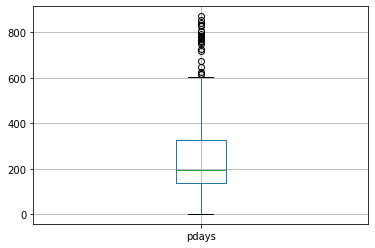

In [68]:
data3.boxplot(column=['pdays'])

In [69]:
uf_pdays=326+(1.5*(326-136))
uf_pdays

611.0

In [70]:
lf_pdays=326-(1.5*(326-136))
lf_pdays

41.0

In [71]:
data3[data3.pdays>uf_pdays]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
43034,46,0.0,1,2.0,0,349,0,0,0.0,15,2,295,2,616,1,0.0,1
43404,54,1.0,1,1.0,0,2102,1,0,0.0,5,4,547,1,626,2,0.0,1
43507,39,3.0,0,1.0,0,1672,1,0,0.0,20,4,462,1,648,1,0.0,1
43964,32,0.0,1,2.0,0,913,1,0,0.0,23,6,883,1,674,4,0.0,0
44038,31,0.0,0,2.0,0,1539,1,0,0.0,30,6,107,2,756,2,1.0,0
44089,37,1.0,1,1.0,0,432,1,0,0.0,6,7,386,3,776,55,0.0,1
44287,37,1.0,1,1.0,0,1707,1,0,0.0,26,7,546,2,784,3,0.0,1
44446,32,0.0,0,2.0,0,1077,0,0,0.0,5,8,200,1,717,4,0.0,0
44496,33,0.0,1,2.0,0,1514,0,0,0.0,10,8,447,1,728,2,0.0,1
44530,34,3.0,1,1.0,0,320,1,0,0.0,12,8,352,1,828,2,0.0,1


In [72]:
data4=data3[data3.pdays<uf_pdays]
data4

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24064,33,6.0,1,1.0,0,3444,1,0,1.0,21,10,144,1,91,4,0.0,1
24072,36,0.0,1,2.0,0,2415,1,0,1.0,22,10,73,1,86,4,1.0,0
24077,36,0.0,1,2.0,0,0,1,0,1.0,23,10,140,1,143,3,0.0,1
24086,44,3.0,1,1.0,0,1324,1,0,1.0,25,10,119,1,89,2,1.0,0
24122,26,1.0,0,2.0,0,172,0,1,1.0,4,11,21,1,140,4,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,59,0.0,1,2.0,0,138,1,1,0.0,16,11,162,2,187,5,0.0,0
45195,68,4.0,1,1.0,0,1146,0,0,0.0,16,11,212,1,187,6,2.0,1
45199,34,3.0,0,1.0,0,1475,1,0,0.0,16,11,1166,3,530,12,1.0,0
45201,53,0.0,1,2.0,0,583,0,0,0.0,17,11,226,1,184,4,2.0,1


In [73]:
data4.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000
mean,40.183058,2.837248,0.794817,1.234278,0.007122,1553.652220,0.640703,0.137445,0.068950,14.263676,5.791938,260.537657,2.091226,221.701773,3.178209,0.570996,0.219579
std,10.242193,2.839530,0.609884,0.670674,0.084099,2853.972065,0.479831,0.344343,0.253388,7.854014,3.097910,237.690236,1.601241,106.824450,4.776585,0.769659,0.413993
min,18.000000,0.000000,0.000000,0.000000,0.000000,-1884.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,1.000000,0.000000,164.500000,0.000000,0.000000,0.000000,7.000000,4.000000,113.000000,1.000000,135.500000,1.000000,0.000000,0.000000
50%,38.000000,3.000000,1.000000,1.000000,0.000000,589.000000,1.000000,0.000000,0.000000,14.000000,5.000000,192.000000,2.000000,195.000000,2.000000,0.000000,0.000000
75%,47.000000,4.000000,1.000000,2.000000,0.000000,1761.000000,1.000000,0.000000,0.000000,19.000000,8.000000,323.000000,2.000000,325.000000,4.000000,1.000000,0.000000
max,70.000000,10.000000,2.000000,2.000000,1.000000,52587.000000,1.000000,1.000000,1.000000,31.000000,12.000000,2219.000000,16.000000,603.000000,275.000000,2.000000,1.000000


In [74]:
data4.balance=data4.balance.apply(lambda v: (v-data4.balance.min())/(data4.balance.max()-data4.balance.min()))

C:\Users\abc\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [75]:
data4

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24064,33,6.0,1,1.0,0,0.097814,1,0,1.0,21,10,144,1,91,4,0.0,1
24072,36,0.0,1,2.0,0,0.078923,1,0,1.0,22,10,73,1,86,4,1.0,0
24077,36,0.0,1,2.0,0,0.034587,1,0,1.0,23,10,140,1,143,3,0.0,1
24086,44,3.0,1,1.0,0,0.058894,1,0,1.0,25,10,119,1,89,2,1.0,0
24122,26,1.0,0,2.0,0,0.037745,0,1,1.0,4,11,21,1,140,4,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,59,0.0,1,2.0,0,0.037121,1,1,0.0,16,11,162,2,187,5,0.0,0
45195,68,4.0,1,1.0,0,0.055626,0,0,0.0,16,11,212,1,187,6,2.0,1
45199,34,3.0,0,1.0,0,0.061666,1,0,0.0,16,11,1166,3,530,12,1.0,0
45201,53,0.0,1,2.0,0,0.045290,0,0,0.0,17,11,226,1,184,4,2.0,1


In [76]:
data4.duration=data4.duration.apply(lambda v: (v-data4.duration.min())/(data4.duration.max()-data2.duration.min()))

C:\Users\abc\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [77]:
data4

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24064,33,6.0,1,1.0,0,0.097814,1,0,1.0,21,10,0.062782,1,91,4,0.0,1
24072,36,0.0,1,2.0,0,0.078923,1,0,1.0,22,10,0.030714,1,86,4,1.0,0
24077,36,0.0,1,2.0,0,0.034587,1,0,1.0,23,10,0.060976,1,143,3,0.0,1
24086,44,3.0,1,1.0,0,0.058894,1,0,1.0,25,10,0.051491,1,89,2,1.0,0
24122,26,1.0,0,2.0,0,0.037745,0,1,1.0,4,11,0.007227,1,140,4,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,59,0.0,1,2.0,0,0.037121,1,1,0.0,16,11,0.070912,2,187,5,0.0,0
45195,68,4.0,1,1.0,0,0.055626,0,0,0.0,16,11,0.093496,1,187,6,2.0,1
45199,34,3.0,0,1.0,0,0.061666,1,0,0.0,16,11,0.524390,3,530,12,1.0,0
45201,53,0.0,1,2.0,0,0.045290,0,0,0.0,17,11,0.099819,1,184,4,2.0,1


In [78]:
data4.pdays=data4.pdays.apply(lambda v: (v-data4.pdays.min())/(data4.pdays.max()-data2.pdays.min()))

C:\Users\abc\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [79]:
data4

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24064,33,6.0,1,1.0,0,0.097814,1,0,1.0,21,10,0.062782,1,0.149502,4,0.0,1
24072,36,0.0,1,2.0,0,0.078923,1,0,1.0,22,10,0.030714,1,0.141196,4,1.0,0
24077,36,0.0,1,2.0,0,0.034587,1,0,1.0,23,10,0.060976,1,0.235880,3,0.0,1
24086,44,3.0,1,1.0,0,0.058894,1,0,1.0,25,10,0.051491,1,0.146179,2,1.0,0
24122,26,1.0,0,2.0,0,0.037745,0,1,1.0,4,11,0.007227,1,0.230897,4,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,59,0.0,1,2.0,0,0.037121,1,1,0.0,16,11,0.070912,2,0.308970,5,0.0,0
45195,68,4.0,1,1.0,0,0.055626,0,0,0.0,16,11,0.093496,1,0.308970,6,2.0,1
45199,34,3.0,0,1.0,0,0.061666,1,0,0.0,16,11,0.524390,3,0.878738,12,1.0,0
45201,53,0.0,1,2.0,0,0.045290,0,0,0.0,17,11,0.099819,1,0.303987,4,2.0,1


In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
x=data4.iloc[:,0:15]
y=data4.iloc[:,16]

In [82]:
classifier = LogisticRegression()
classifier.fit(x,y)

C:\Users\abc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
y_pred = classifier.predict(x)

In [84]:
y_pred_df= pd.DataFrame({'actual': y,
                         'predicted_prob': classifier.predict(x)})

In [85]:
y_pred_df

,actual,predicted_prob
24064,1,0
24072,0,0
24077,1,0
24086,0,0
24122,0,0
...,...,...
45194,0,0
45195,1,0
45199,0,1
45201,1,0


In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix)

[[4908  242]
 [1030  419]]


Text(0, 0.5, 'True Positive Rate')

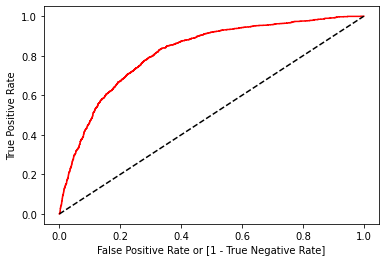

In [87]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba (x)[:,1])

auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [88]:
auc

0.6210873250383592

As we can my accuracy or auc is 0.621 which is greater than 0.5 so i assume my model is a good model